# Importing Necessary Libraries

In [82]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

# Loading the Model and the Data

In [85]:
model = tf.keras.models.load_model("../Models/Model.h5")

In [87]:
X, y = np.load("../Features.npy"), np.load("../Labels.npy")

## Splitting the Data

In [90]:
_, X_test, _, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 30)

In [92]:
X_test.shape, y_test.shape

((21884, 250, 2), (21884,))

## Plotting Random Samples

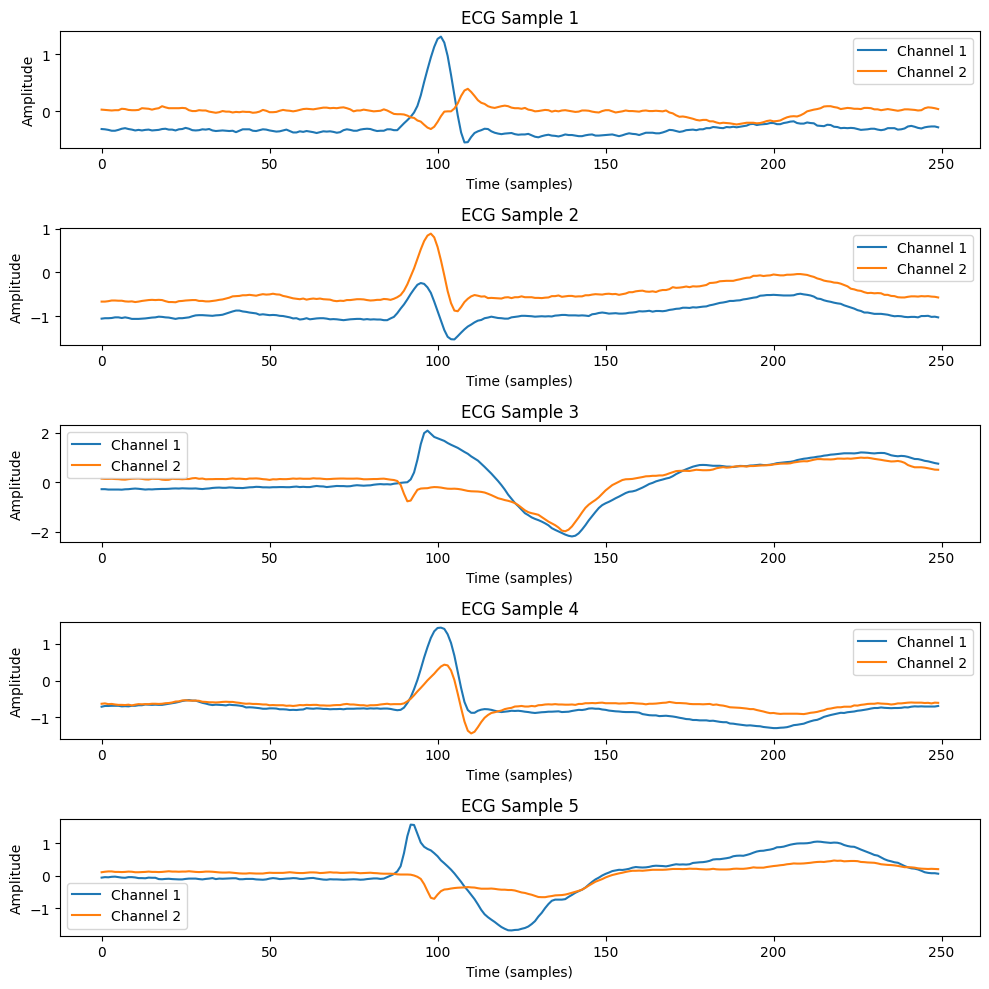

In [57]:
num_samples = 5
fig, axs = plt.subplots(num_samples, 1, figsize=(10, 10))

for i in range(num_samples):
    axs[i].plot(X_test[i, :, 0], label='Channel 1')
    axs[i].plot(X_test[i, :, 1], label='Channel 2')
    axs[i].set_title(f'ECG Sample {i + 1}')
    axs[i].set_xlabel('Time (samples)')
    axs[i].set_ylabel('Amplitude')
    axs[i].legend()

plt.tight_layout()
plt.show()

# Inference

In [94]:
symbol, code = [], []

with open("../Remapped_Symbol_Classes.txt", "r", encoding = "utf-8") as file:
    for line in file:
        if "→" in line:
            s, c = line.strip().split("→")
            symbol.append(s.rstrip())
            code.append(c.lstrip())

In [25]:
symbol, code

(['/', 'A', 'E', 'F', 'J', 'L', 'N', 'R', 'S', 'V', 'a', 'e', 'f', 'j'],
 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'])

In [27]:
# Abnormal Beat Symbols
abnormal = ['L','R','V','/','A','f','F','j','a','E','J','e','S']

# Normal Beat Symbols
normal = ['N'] 

In [44]:
i = random.randint(0, X_test.shape[0] + 1)

In [46]:
temp = np.expand_dims(X_test[i, :, :], axis = 0)

In [48]:
idx = np.argmax(model.predict(temp))

1/1 [==============================] - 0s 20ms/step


In [50]:
idx

6

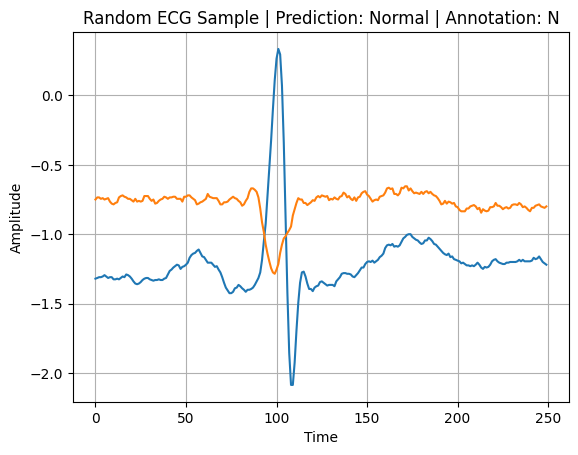

In [52]:
plt.plot(X_test[i, :, :])
plt.title(f"Random ECG Sample | Prediction: {'Normal' if idx == 6 else 'Abnormal'} | Annotation: {symbol[idx]}")
plt.grid()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()